In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tcs-file/TCS.NS.csv


In [2]:
data=pd.read_csv("/kaggle/input/tcs-file/TCS.NS.csv")

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-16,2096.000000,2136.000000,2080.300049,2126.750000,2086.768066,5574177.0
1,2019-12-17,2126.500000,2169.000000,2119.000000,2164.949951,2124.250000,6059673.0
2,2019-12-18,2174.000000,2203.449951,2153.000000,2167.750000,2126.997314,8251081.0
3,2019-12-19,2179.800049,2236.500000,2167.550049,2229.050049,2187.145264,6251505.0
4,2019-12-20,2220.000000,2246.699951,2208.250000,2222.899902,2181.110596,5548338.0
...,...,...,...,...,...,...,...
247,2020-12-10,2818.000000,2827.300049,2780.250000,2784.300049,2784.300049,2127801.0
248,2020-12-11,2792.699951,2807.699951,2764.550049,2783.600098,2783.600098,1795408.0
249,2020-12-14,2802.000000,2804.000000,2756.250000,2797.699951,2797.699951,2483658.0
250,2020-12-15,2786.000000,2794.699951,2755.000000,2761.550049,2761.550049,2365509.0


In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-16,2096.000000,2136.000000,2080.300049,2126.750000,2086.768066,5574177.0
1,2019-12-17,2126.500000,2169.000000,2119.000000,2164.949951,2124.250000,6059673.0
2,2019-12-18,2174.000000,2203.449951,2153.000000,2167.750000,2126.997314,8251081.0
3,2019-12-19,2179.800049,2236.500000,2167.550049,2229.050049,2187.145264,6251505.0
4,2019-12-20,2220.000000,2246.699951,2208.250000,2222.899902,2181.110596,5548338.0


In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [6]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2234.510356,2265.382260,2205.041843,2233.662748,2216.480165,4.039248e+06
std,304.529785,298.283311,306.963270,303.157522,310.037930,2.263970e+06
min,1559.699951,1685.449951,1506.050049,1636.349976,1620.991089,1.319430e+06
25%,2045.500000,2064.000000,2019.974976,2043.399964,2027.115601,2.660976e+06
50%,2205.000000,2226.899902,2183.800049,2201.949951,2165.411377,3.400908e+06
75%,2409.475098,2447.000000,2359.050049,2424.300049,2414.007812,4.760710e+06
max,2845.000000,2885.000000,2812.199951,2830.000000,2817.985352,1.983933e+07


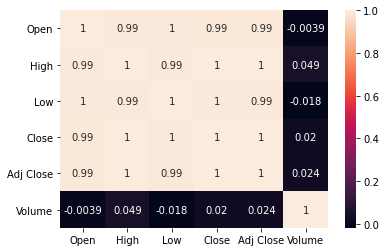

In [10]:
import seaborn as sns

cor = sns.heatmap(data.corr(), annot = True)

In [11]:
#Let's select our features
x = data.loc[:,'Open':'Low']
y = data.loc[:,'Close']

In [12]:
x.head()

,Open,High,Low
0,2096.000000,2136.000000,2080.300049
1,2126.500000,2169.000000,2119.000000
2,2174.000000,2203.449951,2153.000000
3,2179.800049,2236.500000,2167.550049
4,2220.000000,2246.699951,2208.250000


In [13]:
y

0      2126.750000
1      2164.949951
2      2167.750000
3      2229.050049
4      2222.899902
          ...     
247    2784.300049
248    2783.600098
249    2797.699951
250    2761.550049
251    2814.199951
Name: Close, Length: 251, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

In [16]:
# LINEARE

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
LR = LinearRegression()

In [19]:
LR.fit(x_train,y_train)

LinearRegression()

In [20]:
LR.score(x_test,y_test)

0.9958201352745529

In [21]:
x.head(2)

,Open,High,Low
0,2096.0,2136.0,2080.300049
1,2126.5,2169.0,2119.000000


In [22]:
Test_data = [[2786.0,2794.6,2755.0]]
prediction = LR.predict(Test_data)

In [23]:
print(prediction)

[2771.08659441]


In [24]:
data.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
250,2020-12-15,2786.0,2794.699951,2755.000000,2761.550049,2761.550049,2365509.0
251,2020-12-16,2779.0,2819.800049,2760.449951,2814.199951,2814.199951,2563601.0


In [25]:
Test_data = [[2811.0, 2845.00 ,2805.0]]
prediction = LR.predict(Test_data)

In [26]:
print(prediction)

[2831.93994148]


In [27]:
## LSTM

In [28]:
import math

In [29]:
data = data.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

201

In [30]:
from sklearn.preprocessing import MinMaxScaler 

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.41084071],
       [0.44284335],
       [0.44518914],
       [0.49654426],
       [0.49139188],
       [0.49876426],
       [0.48527635],
       [0.47384071],
       [0.47095046],
       [0.45813259],
       [0.44012061],
       [0.44506355],
       [0.43672761],
       [0.47275157],
       [0.47258406],
       [0.47710812],
       [0.51849371],
       [0.48422914],
       [0.48355888],
       [0.46412274],
       [0.47798761],
       [0.49474294],
       [0.50471249],
       [0.48820853],
       [0.44736741],
       [0.44795381],
       [0.47798761],
       [0.46462528],
       [0.4583001 ],
       [0.44644579],
       [0.4585934 ],
       [0.43417259],
       [0.42014   ],
       [0.37087929],
       [0.39052487],
       [0.39492315],
       [0.42742853],
       [0.41218122],
       [0.41905086],
       [0.44033005],
       [0.43316711],
       [0.44770244],
       [0.46546305],
       [0.45897035],
       [0.47492985],
       [0.48540193],
       [0.46914934],
       [0.436

In [32]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.41084071, 0.44284335, 0.44518914, 0.49654426, 0.49139188,
       0.49876426, 0.48527635, 0.47384071, 0.47095046, 0.45813259,
       0.44012061, 0.44506355, 0.43672761, 0.47275157, 0.47258406,
       0.47710812, 0.51849371, 0.48422914, 0.48355888, 0.46412274,
       0.47798761, 0.49474294, 0.50471249, 0.48820853, 0.44736741,
       0.44795381, 0.47798761, 0.46462528, 0.4583001 , 0.44644579,
       0.4585934 , 0.43417259, 0.42014   , 0.37087929, 0.39052487,
       0.39492315, 0.42742853, 0.41218122, 0.41905086, 0.44033005,
       0.43316711, 0.44770244, 0.46546305, 0.45897035, 0.47492985,
       0.48540193, 0.46914934, 0.43601563, 0.40129025, 0.43547096,
       0.40820183, 0.39303817, 0.30477949, 0.30574294, 0.33498091,
       0.37435594, 0.40941655, 0.40221167, 0.28148954, 0.26586518])]
[0.11184182743333171]

[array([0.41084071, 0.44284335, 0.44518914, 0.49654426, 0.49139188,
       0.49876426, 0.48527635, 0.47384071, 0.47095046, 0.45813259,
       0.44012061, 0.44506355, 0.43

In [33]:

x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [35]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))


NameError: name 'Sequential' is not defined

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

NameError: name 'model' is not defined

In [37]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

NameError: name 'model' is not defined

In [38]:
# here we are testing data set
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [39]:
x_test

[array([0.48896244, 0.44870772, 0.50060731, 0.50131949, 0.47283543,
        0.47882538, 0.4931932 , 0.46462528, 0.44807939, 0.43651817,
        0.47790396, 0.56415198, 0.53591929, 0.53880954, 0.54040122,
        0.51757208, 0.51384406, 0.52205421, 0.56276975, 0.55208822,
        0.54157421, 0.53914457, 0.5202531 , 0.51782345, 0.50751888,
        0.51694376, 0.53064132, 0.51962477, 0.51648315, 0.51292264,
        0.51250376, 0.50793777, 0.51702761, 0.51275492, 0.50450305,
        0.52016924, 0.51103767, 0.52678751, 0.55556487, 0.54660081,
        0.57864538, 0.59636406, 0.57914792, 0.5820801 , 0.61806234,
        0.71633218, 0.71633218, 0.72605036, 0.69082223, 0.68156487,
        0.6944666 , 0.74276376, 0.69626772, 0.58300173, 0.65844264,
        0.66179371, 0.71381888, 0.71708629, 0.74318264, 0.89594944]),
 array([0.44870772, 0.50060731, 0.50131949, 0.47283543, 0.47882538,
        0.4931932 , 0.46462528, 0.44807939, 0.43651817, 0.47790396,
        0.56415198, 0.53591929, 0.53880954, 0.

In [40]:
x_test = np.array(x_test)

In [41]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [42]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

NameError: name 'model' is not defined

In [43]:
print(predictions)

NameError: name 'predictions' is not defined

In [44]:
# here we are calculaing the value of RMSE 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

NameError: name 'predictions' is not defined

In [45]:
Test_data = [[2819.800049,2760.449951,2814.199951]]  
prediction4 = model.predict(Test_data)

NameError: name 'model' is not defined

In [46]:
print(prediction4)

NameError: name 'prediction4' is not defined

In [47]:
## RF

In [48]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.